<a href="https://colab.research.google.com/github/AkashG1226/Machine-Leaning-Project-/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/purchase.csv')

In [ ]:
df

,ID,Age,Gender,Income,Education,Marital Status,Purchased
0,1,22,Male,35,Bachelor,Single,No
1,2,25,Female,40,Master,Single,Yes
2,3,47,Male,85,PhD,Married,Yes
3,4,52,Female,110,Bachelor,Married,No
4,5,46,Male,78,Master,Married,Yes
5,6,56,Female,95,Bachelor,Single,No
6,7,35,Female,60,PhD,Married,Yes
7,8,33,Male,58,Bachelor,Single,No
8,9,29,Female,45,Master,Single,Yes
9,10,41,Male,80,PhD,Married,Yes


In [ ]:
le=LabelEncoder()
df['ID_n']=le.fit_transform(df['ID'])
df['Age_n']=le.fit_transform(df['Age'])
df['Gender_n']=le.fit_transform(df['Gender'])
df['Income_n']=le.fit_transform(df['Income'])
df['Education_n']=le.fit_transform(df['Education'])
df['Marital Status_n']=le.fit_transform(df['Marital Status'])
df['Purchased_n']=le.fit_transform(df['Purchased'])
df

,ID,Age,Gender,Income,Education,Marital Status,Purchased,ID_n,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,1,22,Male,35,Bachelor,Single,No,0,0,1,0,0,1,0
1,2,25,Female,40,Master,Single,Yes,1,1,0,1,1,1,1
2,3,47,Male,85,PhD,Married,Yes,2,7,1,7,2,0,1
3,4,52,Female,110,Bachelor,Married,No,3,8,0,9,0,0,0
4,5,46,Male,78,Master,Married,Yes,4,6,1,5,1,0,1
5,6,56,Female,95,Bachelor,Single,No,5,9,0,8,0,1,0
6,7,35,Female,60,PhD,Married,Yes,6,4,0,4,2,0,1
7,8,33,Male,58,Bachelor,Single,No,7,3,1,3,0,1,0
8,9,29,Female,45,Master,Single,Yes,8,2,0,2,1,1,1
9,10,41,Male,80,PhD,Married,Yes,9,5,1,6,2,0,1


In [ ]:
df=df.drop(['ID','Purchased'],axis=1)
df

,Age,Gender,Income,Education,Marital Status,ID_n,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,22,Male,35,Bachelor,Single,0,0,1,0,0,1,0
1,25,Female,40,Master,Single,1,1,0,1,1,1,1
2,47,Male,85,PhD,Married,2,7,1,7,2,0,1
3,52,Female,110,Bachelor,Married,3,8,0,9,0,0,0
4,46,Male,78,Master,Married,4,6,1,5,1,0,1
5,56,Female,95,Bachelor,Single,5,9,0,8,0,1,0
6,35,Female,60,PhD,Married,6,4,0,4,2,0,1
7,33,Male,58,Bachelor,Single,7,3,1,3,0,1,0
8,29,Female,45,Master,Single,8,2,0,2,1,1,1
9,41,Male,80,PhD,Married,9,5,1,6,2,0,1


In [ ]:
independent_var=df.drop(['Age','Gender','Income','Education','Marital Status'],axis=1)
dependent_var=df['Purchased_n']
independent_var

,ID_n,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,0,0,1,0,0,1,0
1,1,1,0,1,1,1,1
2,2,7,1,7,2,0,1
3,3,8,0,9,0,0,0
4,4,6,1,5,1,0,1
5,5,9,0,8,0,1,0
6,6,4,0,4,2,0,1
7,7,3,1,3,0,1,0
8,8,2,0,2,1,1,1
9,9,5,1,6,2,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent_var,dependent_var,test_size=0.3, random_state=42)
#

In [ ]:
model= RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 33.33%


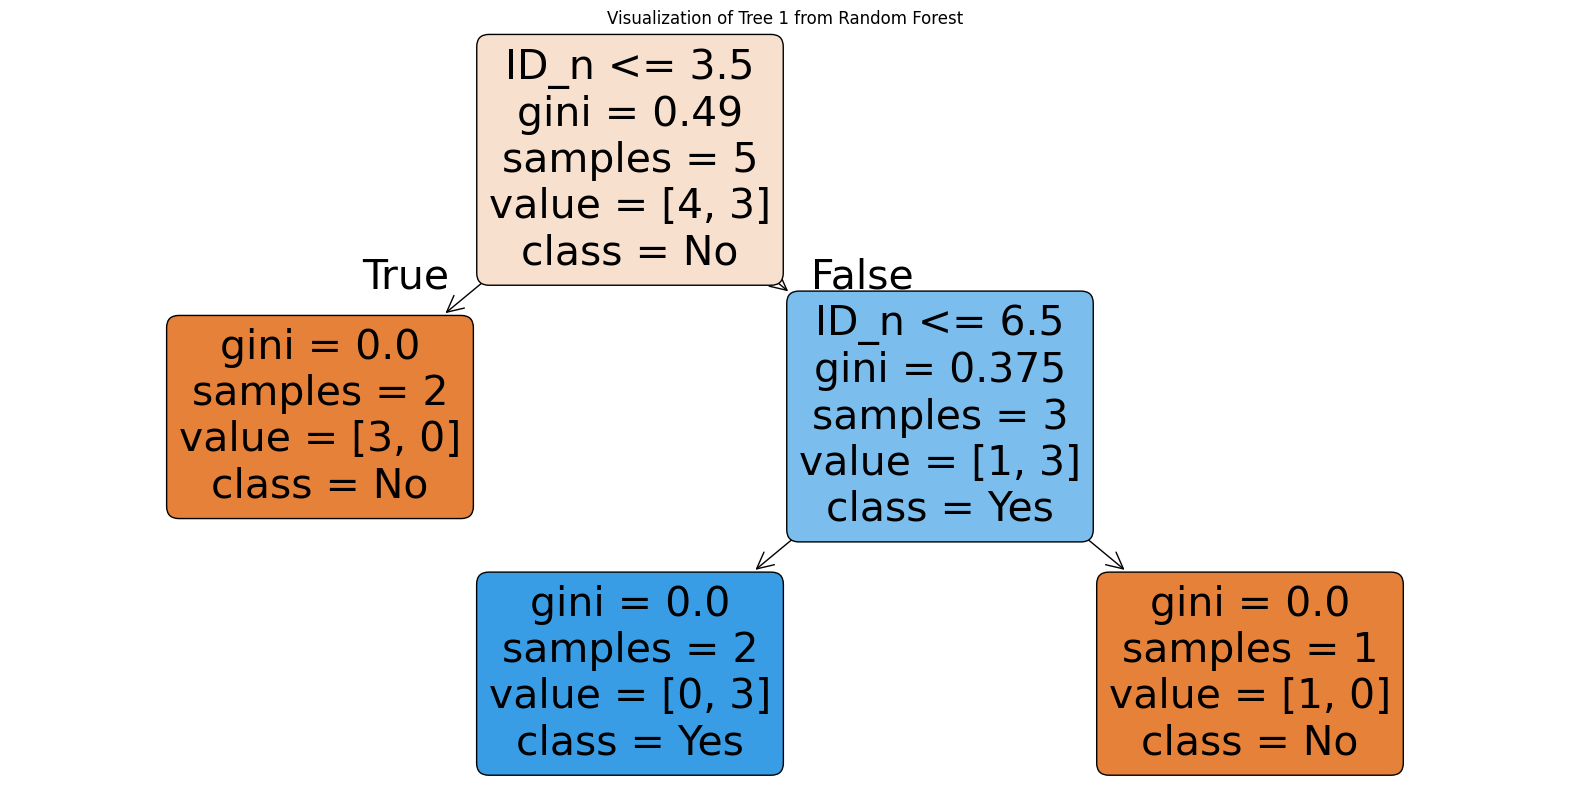

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the first decision tree from your trained Random Forest model
first_tree = model.estimators_[0]

# Visualize the first tree
plt.figure(figsize=(20, 10))
plot_tree(
    first_tree,
    feature_names=independent_var.columns,  # Use your encoded feature column names
    class_names=['No', 'Yes'],             # Assuming 0 = No, 1 = Yes for 'Purchased'
    filled=True,
    rounded=True,
    max_depth=3                            # Optional: limit tree depth for clarity
)
plt.title("Visualization of Tree 1 from Random Forest")
plt.show()